In [1]:
from vqc.vqc_circuits import *
from cirq.contrib.svg import SVGCircuit

In [4]:
num_qubits = 4
num_layers = 5

uqc = UQC(num_qubits, num_layers)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

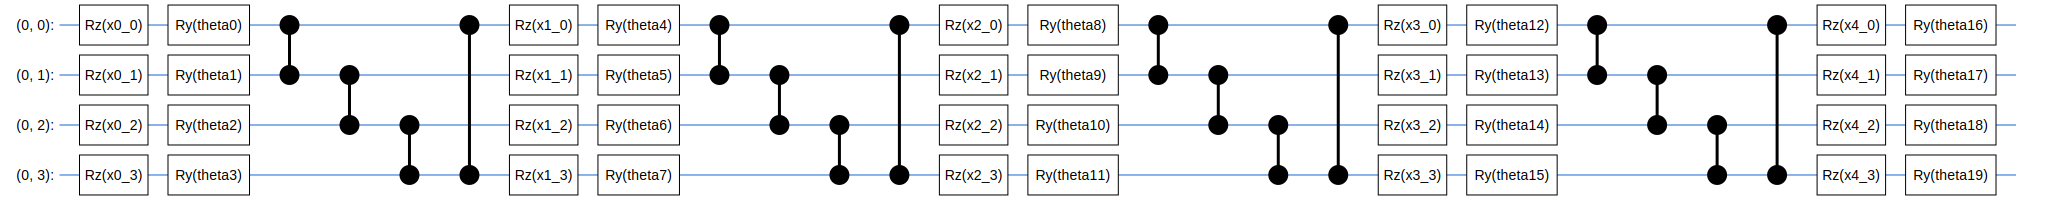

In [5]:
SVGCircuit(uqc.circuit)

In [4]:
uqc.parameters

[theta0, theta1, theta2, theta3, theta4, theta5]

In [5]:
import tensorflow as tf

In [6]:
theta_symbols, input_symbols = uqc.parameters, uqc.inputs

In [7]:
symbols = [str(symb) for symb in theta_symbols + input_symbols]
indices = tf.constant([symbols.index(a) for a in sorted(symbols)])

2023-04-30 15:14:35.627272: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-30 15:14:35.669380: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-30 15:14:35.669455: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-30 15:14:35.670867: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

In [8]:
state_size = 4

In [9]:
theta_init = tf.random_uniform_initializer(minval=0.0, maxval=np.pi)
theta = tf.Variable(initial_value=theta_init(shape=(1, len(theta_symbols)), dtype="float32"))
print("Thetas", theta)

w_init = tf.random_normal_initializer(mean=0.0, stddev=1)
w = tf.Variable(initial_value = w_init(shape = (num_layers,num_qubits,state_size), dtype = "float32"))
print("W", w)
        
b_init = tf.random_normal_initializer(mean=0.0, stddev=1)
#b_init = tf.random_normal_initializer(mean=0.0, stddev=0.1)
b = tf.Variable(initial_value = b_init(shape = (num_layers,num_qubits), dtype = "float32"))
print("B", b)

Thetas <tf.Variable 'Variable:0' shape=(1, 6) dtype=float32, numpy=
array([[1.0045788 , 2.1837795 , 2.6492646 , 0.9868766 , 0.32571512,
        0.25387233]], dtype=float32)>
W <tf.Variable 'Variable:0' shape=(3, 2, 4) dtype=float32, numpy=
array([[[ 0.40569243, -0.62483126, -0.18749611,  0.81928974],
        [ 1.1096076 , -2.0239332 , -1.2835801 , -0.04816956]],

       [[ 0.5339693 ,  0.7501102 ,  1.0311714 ,  0.7866034 ],
        [-1.9672835 , -0.58688366,  0.90287834, -1.1822499 ]],

       [[ 0.51129156, -0.35648385,  0.70196736,  0.8480966 ],
        [-1.5714412 ,  1.2228214 , -1.2697752 ,  0.54176885]]],
      dtype=float32)>
B <tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[-0.8123364 ,  0.32774994],
       [-1.2374929 ,  1.0792578 ],
       [-1.240873  ,  1.0454992 ]], dtype=float32)>


In [10]:
batch_dim = 1

In [11]:
tiled_up_thetas = tf.tile(tf.multiply(theta,2), multiples=[batch_dim, 1])

In [14]:
inputs = tf.random.uniform(shape = (batch_dim, state_size), minval = 0, maxval = 1)
inputs

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[0.77486265, 0.63901734, 0.57549345, 0.45996523]], dtype=float32)>

In [15]:
reshaped_inputs = tf.reshape(inputs, (batch_dim, 1, 1, state_size))
reshaped_inputs

<tf.Tensor: shape=(1, 1, 1, 4), dtype=float32, numpy=
array([[[[0.77486265, 0.63901734, 0.57549345, 0.45996523]]]],
      dtype=float32)>

In [18]:
tiled_inputs = tf.tile(reshaped_inputs, multiples = [1,num_layers, num_qubits,1])
tiled_inputs

<tf.Tensor: shape=(1, 3, 2, 4), dtype=float32, numpy=
array([[[[0.77486265, 0.63901734, 0.57549345, 0.45996523],
         [0.77486265, 0.63901734, 0.57549345, 0.45996523]],

        [[0.77486265, 0.63901734, 0.57549345, 0.45996523],
         [0.77486265, 0.63901734, 0.57549345, 0.45996523]],

        [[0.77486265, 0.63901734, 0.57549345, 0.45996523],
         [0.77486265, 0.63901734, 0.57549345, 0.45996523]]]],
      dtype=float32)>

In [19]:
inputs_times_weights = tf.reduce_sum(tf.multiply(w,2) * reshaped_inputs, axis = -1, keepdims = False)
inputs_times_weights

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[ 0.3680398, -2.3887663],
        [ 3.696658 , -3.8471932],
        [ 1.924908 , -1.8355987]]], dtype=float32)>

In [20]:
tiled_up_bias = tf.reshape(tf.tile(b, multiples = [batch_dim, 1]), (batch_dim, num_layers, num_qubits))
tiled_up_bias

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[-0.8123364 ,  0.32774994],
        [-1.2374929 ,  1.0792578 ],
        [-1.240873  ,  1.0454992 ]]], dtype=float32)>

In [21]:
inputs_times_weights_plus_b = inputs_times_weights + tf.multiply(tiled_up_bias,2)
inputs_times_weights_plus_b

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[-1.256633 , -1.7332664],
        [ 1.221672 , -1.6886775],
        [-0.5568379,  0.2553997]]], dtype=float32)>

In [22]:
reshaped_inputs_times_weights_plus_b = tf.reshape(inputs_times_weights_plus_b, (batch_dim, num_layers * num_qubits))
reshaped_inputs_times_weights_plus_b

<tf.Tensor: shape=(1, 6), dtype=float32, numpy=
array([[-1.256633 , -1.7332664,  1.221672 , -1.6886775, -0.5568379,
         0.2553997]], dtype=float32)>

In [66]:
uqc.num_qubits

2

In [1]:
import numpy as np
import multiprocessing as mp

In [8]:
def some_function(agent_number):
    return np.random.rand()

num_agents = 5

with mp.Pool(num_agents) as p:
    a = p.map(some_function, range(num_agents))

In [10]:
a = [[1,2,3], [4,5,6], [7,8,9]]

In [19]:
a_mean = np.mean(a, axis = 0)
a_mean

array([4., 5., 6.])

In [22]:
a_std = np.std(a, axis = 0)
a_std

array([2.44948974, 2.44948974, 2.44948974])

In [31]:
#Create an array with 200 elements between 0 and 200
x = np.linspace(0, 200, 200)
y = np.linspace(0,200,200)
z = np.linspace(0,200,200)

lista = [x,y,z]

In [33]:
a = [1,2,3,4,5]

In [34]:
a = 5

In [35]:
[a]*4

[5, 5, 5, 5]

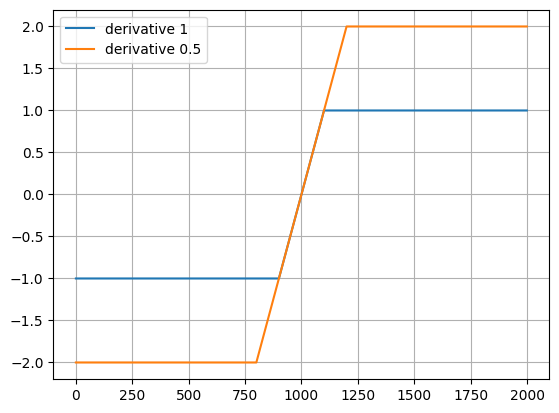

In [13]:
import numpy as np
import matplotlib.pyplot as plt
def huber(a, delta):
  value = np.where(np.abs(a)<delta, .5*a**2, delta*(np.abs(a) - .5*delta))
  deriv = np.where(np.abs(a)<delta, a, np.sign(a)*delta)
  return value, deriv

h, d = huber(np.arange(-10, 10, .01), delta=1)
h2,d2 = huber(np.arange(-10, 10, .01), delta=2)
fig, ax = plt.subplots(1)
ax.plot(d, label='derivative 1')
ax.plot(d2, label='derivative 0.5')
ax.grid(True)
ax.legend()

In [14]:
import tensorflow as tf
import numpy as np

In [173]:
layer = tf.keras.layers.Dense(6, activation = "relu")
x = tf.constant([[1., 2., 3.,4.,5.,6.]])

true_values = tf.constant([[120, 5, 10, 23, 57, 300]], shape = (1,6))

with tf.GradientTape() as tape:
    predictions = layer(x)
    loss = tf.keras.losses.Huber(1)(true_values, predictions)

grads = tape.gradient(loss, layer.trainable_weights)

total_grads = tf.concat([tf.reshape(grad, [-1]) for grad in grads], axis = 0)
np.linalg.norm(total_grads)

3.574602

In [188]:
def huber_loss(error, delta):
    error = tf.constant(error, dtype = tf.float32)
    delta = tf.constant(delta, dtype = tf.float32)
    half = tf.constant(0.5, dtype = tf.float32)
    return tf.where(tf.abs(error) < delta, half * tf.square(error), half * tf.square(delta) + delta * (tf.abs(error) - delta))

def gradiente_huber(error, delta):
    error = tf.constant(error, dtype = tf.float32)
    delta = tf.constant(delta, dtype = tf.float32)
    return tf.where(tf.abs(error) < delta, error, delta * tf.sign(error))

In [191]:
huber_loss(1,1).numpy()

0.5

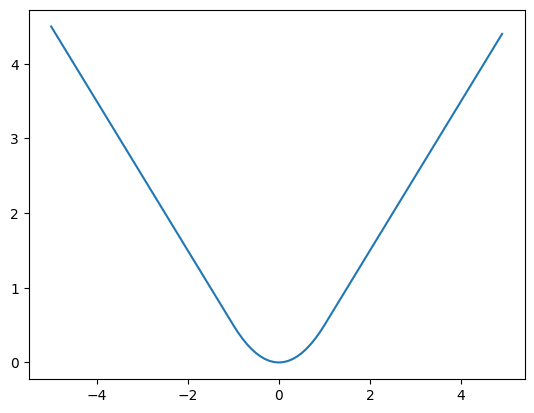

In [195]:
x = np.arange(-5,5,0.1)
plt.plot(x, huber_loss(x, 1))

In [1]:
import numpy as np

In [3]:
lista = [-1,-2,-3,-4,-5]
np.abs(np.trapz(lista))

12.0

In [1]:
import gym
import numpy as np

In [20]:
env = gym.make("Acrobot-v1")
observation = env.reset()

In [6]:
observation

array([ 0.99634833, -0.08538147,  0.99997182, -0.00750785, -0.03557688,
        0.01175998])

In [21]:
list_of_rewards = []
is_done = []
next_states = []
infos = []

for i in range(500):
    next_state, reward, done, info = env.step(env.action_space.sample())
    list_of_rewards.append(reward)
    is_done.append(done)
    next_states.append(next_state)
    infos.append(info)
